In [11]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.tools import PointDrawTool
from bokeh.transform import factor_cmap
import numpy as np
from IPython.display import display, Image


In [3]:
np.random.seed(196808)

x1 = [1, 1]
x2 = [-1, -1]

points = np.random.randn(10, 2)


In [6]:
dist_x1 = np.linalg.norm(points - x1, axis=1)
dist_x2 = np.linalg.norm(points - x2, axis=1)

colors = ['x1' if dist_x1[i] < dist_x2[i] else 'x2' for i in range(len(points))]

source = ColumnDataSource(data={'x': points[:, 0], 
                                'y': points[:, 1], 
                                'color': colors})

In [7]:
p = figure()
renderer = p.scatter('x', 'y', source=source, fill_color=factor_cmap('color', ['blue', 'red'], ['x1', 'x2']), size=12, alpha=0.6)
p.scatter(x=[1,-1], y=[1,-1], marker='inverted_triangle', color='green', size =15, alpha=0.9)

GlyphRenderer(id='p1066', ...)

In [8]:
callback = CustomJS(args=dict(source=source), code="""

    const data = source.data;
    const points_x = data['x'];
    const points_y = data['y'];

    const color = data['color'];

    const x1 = [1, 1];  // Pontos de referência
    const x2 = [-1, -1];  // Pontos de referência
    
    // Recalcula as distâncias dos pontos em relação a x1 e x2
    for (let i = 0; i < points_x.length; i++) {
    
        const dist_x1 = Math.sqrt((points_x[i] - x1[0])**2 + (points_y[i] - x1[1])**2);
        const dist_x2 = Math.sqrt((points_x[i] - x2[0])**2 + (points_y[i] - x2[1])**2);

        // Atualiza a cor com base na menor distância
        if (dist_x1 < dist_x2) {
            color[i] = 'x1';
        } else {
            color[i] = 'x2';
        }

    }
    
    source.change.emit();
""")

In [9]:
draw_tool = PointDrawTool(renderers=[renderer], empty_value='blue', add=True)

source.js_on_change("data", callback)
draw_tool.js_on_change('renderers', callback)


In [10]:
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool


# Exibe o gráfico
show(p)

Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


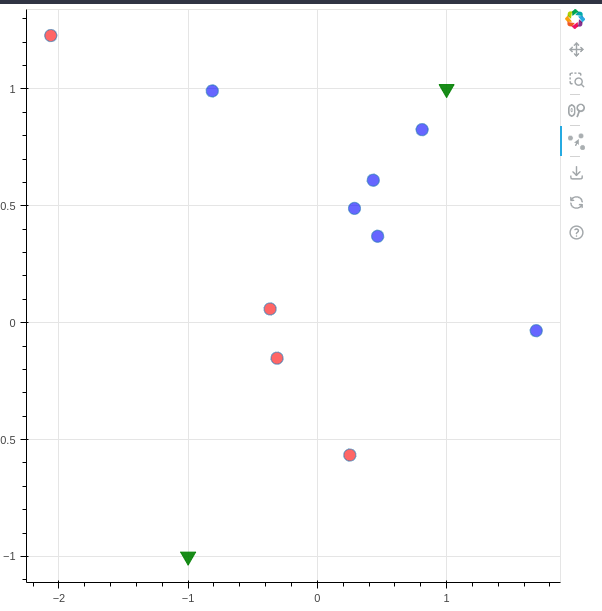

In [12]:
imagem_local = Image(filename='cores.png')
display(imagem_local)